# Unit 12 - Tales from the Crypto

## Natural learning Processes Analysis Notebook

This notebook seeks to apply the natural learning process (NLP) to understand the sentitment in the latest news articles related to Cryptocurrency featuring coins such as; Bitcoin and Ethereum. Using NLP fundamental techniques will help better understand other relevant factors involved with coin prices such as; common words, phrases, organizations, and entities mentioned in the selected articles. 

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions at the end of this section:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

### Import the Required Libraries and Dependencies

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alexdg/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### News API & Article Retrieval 

In [2]:
# Read your api key environment variable
load_dotenv("newsapikey.env")
API_key = os.getenv("NEWS_API_KEY")

# Check if API_key loaded correctly through the len function
print(len(API_key))

32


In [3]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
news_api_key = NewsApiClient(api_key=API_key)

In [4]:
# Fetch the Bitcoin news articles (Bitcoin varirable: btc_articles)
btc_articles = news_api_key.get_everything(q = "Bitcoin OR bitcoin OR BTC OR btc", 
                                           language = "en", 
                                           page_size = 100, 
                                           sort_by = "relevancy")

# Show sample Bitcoin article 
btc_articles['articles'][0]

# Print the total amount of Bitcoin articles 
print(f"The total number of articles about Bitcoin are {btc_articles['totalResults']}")

The total number of articles about Bitcoin are 4468


In [5]:
# Fetch the Ethereum news articles (Ethereum variable: eth_articles)
eth_articles = news_api_key.get_everything(q = "Ethereum OR ethereum OR ETH OR eth", 
                                           language = "en", 
                                           page_size = 100, 
                                           sort_by = "relevancy")

# Show sample Ethereum article
eth_articles['articles'][0]

# Print the total amount of Ethereum articles 
print(f"The total number of articles about Ethereum are {eth_articles['totalResults']}")

The total number of articles about Ethereum are 1765


### Bitcoin & Ethereum DataFrames

In [6]:
# Create the Bitcoin sentiment scores DataFrame (Bitcoin sentiment = btc_sentiment)
btc_sentiment = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        btc_sentiment.append({
            "text": text, 
            "date": date, 
            "compound": compound, 
            "positive": pos, 
            "negative": neg, 
            "neutral": neu
        })

    except AttributeError:
        pass

# Create a Bitcoin dataframe (varirable: btc_df)
btc_df = pd.DataFrame(btc_sentiment)

# Re-order btc_df columns
columns = ["compound", "negative", "neutral", "positive", "text", "date"]
btc_df = btc_df[columns]

# Display the df
btc_df.head()

,compound,negative,neutral,positive,text,date
0,0.5106,0.000,0.878,0.122,A ransomware variant called NetWalker is doing...,2020-08-04
1,0.5994,0.000,0.851,0.149,"Casa, a Colorado-based provider of bitcoin sec...",2020-08-06
2,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-20
3,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...,2020-08-19
4,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi...",2020-08-03


In [8]:
# Create the Ethereum sentiment scores DataFrame (Ethereum sentiment = eth_sentiment)
eth_sentiment = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create a Ethereum DataFrame (varirable: eth_df)
eth_df = pd.DataFrame(eth_sentiment)

# Re-order eth_df columns
columns = ["compound", "negative", "neutral", "positive", "text", "date"]
eth_df = eth_df[columns]

# Display the df
eth_df.head()


,compound,negative,neutral,positive,text,date
0,0.2500,0.0,0.933,0.067,A team of researchers from the University of B...,2020-08-24T19:24:42Z
1,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...,2020-09-02T16:00:00Z
2,0.0000,0.0,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...,2020-08-17T04:00:00Z
3,0.2484,0.0,0.943,0.057,Ethereum is one of the most growing cryptocurr...,2020-08-11T13:46:23Z
4,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,2020-08-26T06:07:00Z


### Bitcoin Sentiment Analysis:

In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,negative,neutral,positive
count,97.000000,97.000000,97.000000,97.000000
mean,0.148972,0.042371,0.889175,0.068474
std,0.418517,0.069241,0.079569,0.052890
min,-0.938200,0.000000,0.588000,0.000000
25%,0.000000,0.000000,0.851000,0.000000
50%,0.271400,0.000000,0.910000,0.080000
75%,0.507000,0.082000,0.928000,0.090000
max,0.750600,0.347000,1.000000,0.198000


### Ethereum Sentiment Analysis:

In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.198832,0.023385,0.907469,0.069135
std,0.340326,0.041389,0.077957,0.066922
min,-0.599400,0.000000,0.689000,0.000000
25%,0.000000,0.000000,0.857000,0.000000
50%,0.201450,0.000000,0.920500,0.069000
75%,0.458800,0.053500,0.968500,0.107750
max,0.851900,0.189000,1.000000,0.311000


### Questions:

The following questions regarding mean score, compound score, and positive score are based on the descriptive statistics above. 

**Q: Which coin had the highest mean positive score?**

A: The coin with the highest mean positive score is **Ethereum** with a mean positive score of 0.691. Verses Bitcoin, with a positive mean score of 0.684. 

**Q: Which coin had the highest compound score?**

A: The coin with the highest compound score is **Ethereum** with a max compound score of 0.851. Verses Bitcoin with a max compound score of 0.750.

**Q. Which coin had the highest positive score?**

A: The coin with the highest positive score is **Ethereum** with a max positive score of 0.311. Verses Bitcoin with a max positive score of 0.198. 

---

## 2. Natural Language Processing

The following section is comprised of three parts: 

1. Tokenizer
2. NGrams and Frequency Analysis
3. Word Clouds

### Import the Required Libraries and Dependencies

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexdg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/alexdg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/alexdg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 2.1 Tokenizer

In this first section, NLTK and Python will be used to tokenize the text for each coin. Be sure to:

1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [1]:
# Expand the default stopwords list if necessary
# I did not see any relevan stop words, this is just an example of how
# a stopwords list would be used
# sw_add = {'said'}

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    # tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [18]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = [tokenizer(text) for text in btc_df['text']]

# Display the df
btc_df.head()

,compound,negative,neutral,positive,text,date,tokens
0,0.5106,0.000,0.878,0.122,A ransomware variant called NetWalker is doing...,2020-08-04,"[ransomware, variant, called, netwalker, surpr..."
1,0.5994,0.000,0.851,0.149,"Casa, a Colorado-based provider of bitcoin sec...",2020-08-06,"[casa, coloradobased, provider, bitcoin, secur..."
2,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-20,"[robot, colleague, satoshi, nakaboto, writes, ..."
3,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...,2020-08-19,"[outspoken, bitcoin, whale, rarely, show, affe..."
4,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi...",2020-08-03,"[april, secret, service, seized, bitcoins, cla..."


In [19]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = [tokenizer(text) for text in eth_df['text']]

# Display the df
eth_df.head()

,compound,negative,neutral,positive,text,date,tokens
0,0.2500,0.0,0.933,0.067,A team of researchers from the University of B...,2020-08-24T19:24:42Z,"[team, researcher, university, british, columb..."
1,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...,2020-09-02T16:00:00Z,"[youve, interacted, cryptocurrencies, past, co..."
2,0.0000,0.0,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...,2020-08-17T04:00:00Z,"[tldr, mega, blockchain, mastery, bundle, sale..."
3,0.2484,0.0,0.943,0.057,Ethereum is one of the most growing cryptocurr...,2020-08-11T13:46:23Z,"[ethereum, one, growing, cryptocurrencies, rec..."
4,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,2020-08-26T06:07:00Z,"[london, reuters, sound, like, surefire, bet, ..."


### 2.2 NGrams and Frequency Analysis

This second section will look at the ngrams and word frequency for each coin through two steps; 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

### Import Required Libraries and Dependencies

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams = []
for list in btc_df.tokens:
    btc_ngrams += list 

btc_bigram_count = Counter(ngrams(btc_ngrams, n=2))
print(dict(btc_bigram_count.most_common(10)))


{('satoshi', 'nakaboto'): 44, ('char', 'robot'): 22, ('robot', 'colleague'): 22, ('colleague', 'satoshi'): 22, ('nakaboto', 'writes'): 22, ('writes', 'bitcoin'): 22, ('every', 'fucking'): 22, ('fucking', 'daywelcome'): 22, ('daywelcome', 'another'): 22, ('another', 'edition'): 22}


In [23]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = []
for list in eth_df.tokens:
    eth_ngrams += list 

eth_bigram_count = Counter(ngrams(eth_ngrams, n=2))
print(dict(eth_bigram_count.most_common(10)))

{('char', 'ethereum'): 14, ('btc', 'trading'): 10, ('trading', 'around'): 10, ('ethereum', 'eth'): 8, ('around', 'utc'): 8, ('utc', 'pm'): 8, ('pm', 'et'): 8, ('ether', 'eth'): 8, ('decentralized', 'finance'): 7, ('char', 'bitcoin'): 7}


In [50]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(10)

In [51]:
# Get the top 10 words for Bitcoin
token_count(btc_ngrams)

[('char', 95),
 ('bitcoin', 90),
 ('satoshi', 44),
 ('nakaboto', 44),
 ('btc', 25),
 ('today', 25),
 ('another', 23),
 ('tell', 23),
 ('going', 23),
 ('robot', 22)]

In [52]:
# Get the top 10 words for Ethereum
token_count(eth_ngrams)

[('char', 96),
 ('ethereum', 58),
 ('eth', 26),
 ('bitcoin', 23),
 ('ha', 22),
 ('network', 18),
 ('ether', 17),
 ('price', 17),
 ('new', 16),
 ('high', 15)]

### 2.3 Word Clouds

In the third section, generate word clouds for each coin to summarize the news for Bitcoin and Ethereum cryptocurrencies.

### Import Required Libraries and Dependencies

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

### Bitcoin Word Cloud:

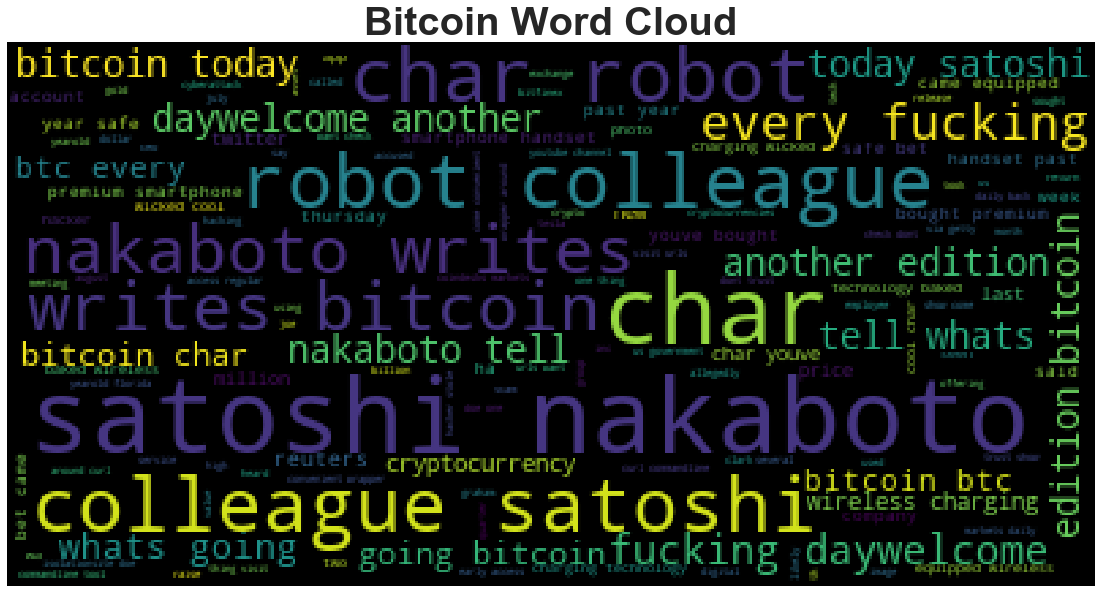

In [33]:
# Generate the Bitcoin word cloud
btc_big_string = ' '.join(btc_ngrams)
word_cloud = WordCloud().generate(btc_big_string)
plt.axis("off")
plt.title("Bitcoin Word Cloud", {"fontsize":40, "fontweight": "bold"})
plt.imshow(word_cloud)

### Ethereum Word Cloud:

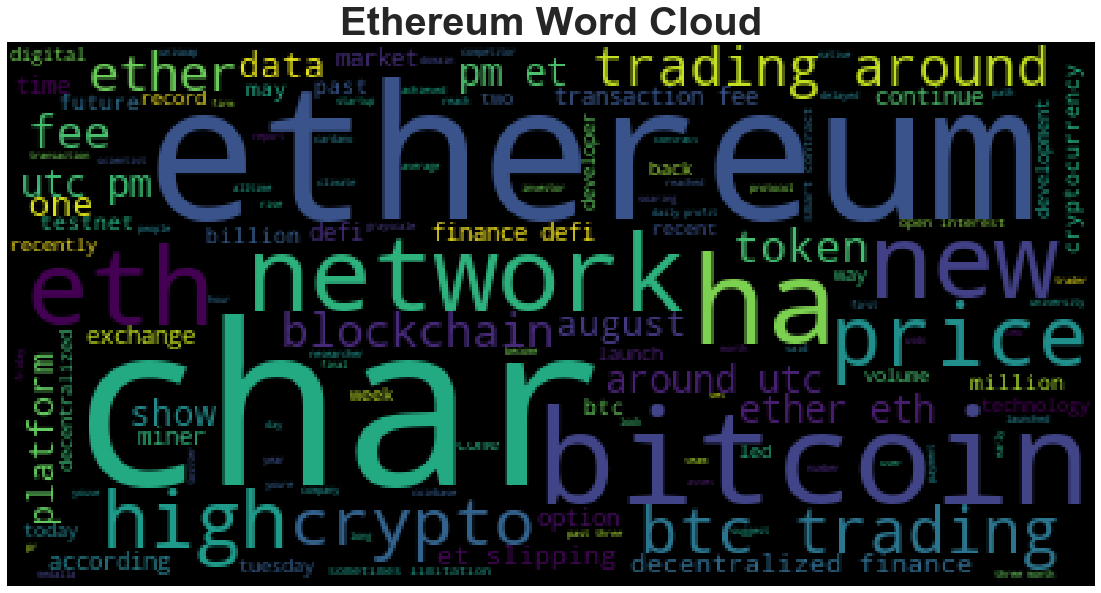

In [34]:
# Generate the Ethereum word cloud
eth_big_string = ' '.join(eth_ngrams)
word_cloud = WordCloud().generate(eth_big_string)
plt.axis("off")
plt.title("Ethereum Word Cloud", {"fontsize":40, "fontweight": "bold"})
plt.imshow(word_cloud)

---
## 3. Named Entity Recognition

In this section, a named entity recognition model will be constructed for both Bitcoin and Ethereum, then the tags will be visualized SpaCy.

### Import Required Libraries and Dependencies

In [35]:
import spacy
from spacy import displacy

In [36]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [37]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

### Bitcoin NER: 

In [38]:
# Concatenate all of the Bitcoin text together
all_btc_corpus = ' '.join(btc_df['text'])

In [39]:
# Run the NER processor on all of the text
btc_doc = nlp(all_btc_corpus)

# Add a title to the document
btc_doc.user_data['title'] = "Bitcoin NER"

In [40]:
# Render the visualization
displacy.render(btc_doc, style = 'ent')

In [41]:
# List all Entities for Bitcoin
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

NetWalker ORG
Bitcoin GPE
$25 million MONEY
the last five DATE
Casa PERSON
Colorado GPE
Coinbas ORG
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
April DATE
the Secret Service ORG
100 CARDINAL
Bitcoins ORG
Clark GPE
Weeks later DATE
Bennett PERSON
the Secret Service ORG
100 CARDINAL
Grayscale Bitcoin BTC Trust FAC
GBTC ORG
Bitcoin GPE
$1.5 billion MONEY
this year DATE
90% PERCENT
just six months DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
months DATE
Guy PERSON
Cryptocurrency ORG
Bitfinex PERSON
$400 million MONEY
$1.33 billion MONEY
Bitcoin BTCstolen FAC
2016 DATE
Bitfinex PERSON
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakabot

### Ethereum NER:

In [42]:
# Concatenate all of the Ethereum text together
all_eth_corpus = ' '.join(eth_df['text'])

In [43]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_corpus)

# Add a title to the document
eth_doc.user_data['title'] = "Ethereum NER"

In [44]:
# Render the visualization
displacy.render(eth_doc, style = 'ent')

In [45]:
# List all Entities for Ethereum
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

the University of British Columbia ORG
Princeton University ORG
the University of California, Berkeley ORG
the Singapore-ETH Centre ORG
the past couple of years DATE
29.81 MONEY
August 17 DATE
97% PERCENT
first ORDINAL
LONDON GPE
Reuters ORG
about 20% PERCENT
Konrad Steffen PERSON
the age of 68 on Saturday DATE
Aug. 8) DATE
Greenland GPE
Steffen ORG
the Swiss Federal Institute for Forest, Snow ORG
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Ethereum ORG
Mateusz Slodkowski/ PERSON
Medalla PERSON
the Ethereum Foundation ORG
ul><li PERSON
Medalla GPE
Rick Wilking PERSON
ul><li PERSON
Michael Novogratz PERSON
Bloomberg PERSON
up to $3,000 MONEY
The Galaxy Digital ORG
Fed ORG
August DATE
4 DATE
2020 DATE
5 CARDINAL
the 0x exchange ORG
Decentralized NORP
DeFi ORG
Bankless YouTube ORG
Tuesday DATE
Mariano Conti PERSON
Monda

---